## **Data Science Intern - Lets Grow More**

## **Author - Priyangshu Sarkar**

##**Task 1 - Neural Network That Can Read Handwriting**

### **Importing Libraries**

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.datasets import mnist
import random
from numpy import argmax

### **Loading dataset**

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


## **Plotting count plot**

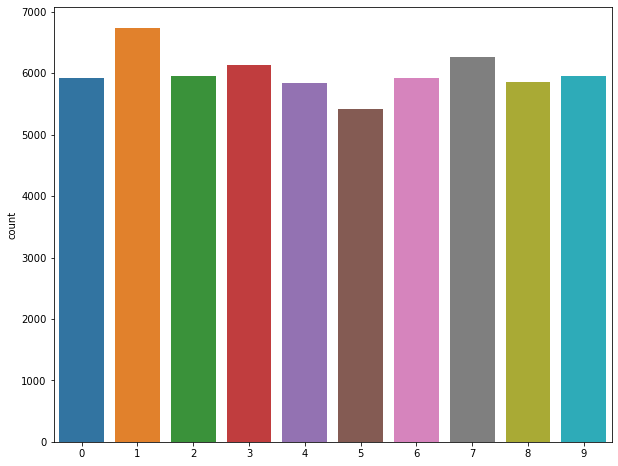

In [4]:
plt.figure(figsize = (10,8))
sns.countplot(y_train)

### **Displaying some images**

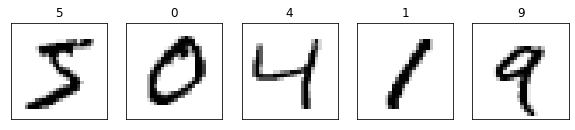

In [5]:
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

### **This means that there are 60,000 images as input data with shape 28 x 28 each.**

In [6]:
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [8]:
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

### **Creating the model**
Model Architecture
We will have to first build the model architecture and define it based on our dataset. We are going to add the following layers:

1. Conv2D - for the convolution layers

2. Dropout - to prevent overfitting

3. Dense - a fully connected layer

4. Softmax activation - This is used to convert all predictions into probability The model architecture can be tuned to get optimal performance

so i am goimg to create a model with

### **CNN + Three layers + relu + (3,3) kernel_size + Dropout rate (0.3)**


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [10]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

### **Training the model**

In [16]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 401s 237ms/step - loss: 0.2719 - accuracy: 0.9194 - val_loss: 0.0722 - val_accuracy: 0.9805
Epoch 2/10
1688/1688 [==============================] - 380s 225ms/step - loss: 0.1182 - accuracy: 0.9651 - val_loss: 0.1008 - val_accuracy: 0.9752
Epoch 3/10
1688/1688 [==============================] - 388s 230ms/step - loss: 0.0970 - accuracy: 0.9725 - val_loss: 0.1135 - val_accuracy: 0.9813
Epoch 4/10
1688/1688 [==============================] - 395s 234ms/step - loss: 0.0778 - accuracy: 0.9770 - val_loss: 0.0952 - val_accuracy: 0.9833
Epoch 5/10
1688/1688 [==============================] - 365s 217ms/step - loss: 0.0676 - accuracy: 0.9802 - val_loss: 0.1452 - val_accuracy: 0.9770
Epoch 6/10
1688/1688 [==============================] - 418s 247ms/step - loss: 0.0612 - accuracy: 0.9819 - val_loss: 0.1456 - val_accuracy: 0.9800
Epoch 7/10
1688/1688 [==============================] - 450s 266ms/step - loss: 0.0574 - accuracy: 0.9838 - val_

### **Saving and loading the model**

In [17]:
model.save('MNproject.h5')

In [18]:
from tensorflow.keras.models import load_model
model = load_model('MNproject.h5')

### **Evaluating the model**

In [19]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 10s 28ms/step - loss: 2.6828 - accuracy: 0.9889
Test Loss 2.682821273803711
Test Accuracy 0.9889000058174133


### **Plotting Training & Validation plots**

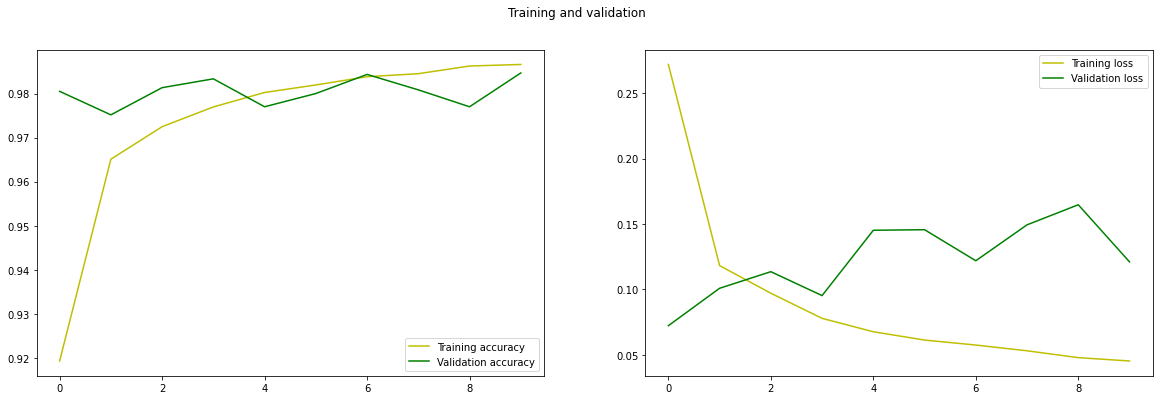

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [21]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 979,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1131,    1,    0,    0,    2,    0,    1,    0,    0],
       [   1,    0, 1025,    0,    0,    0,    0,    6,    0,    0],
       [   0,    1,    5,  996,    0,    7,    0,    0,    1,    0],
       [   0,    0,    0,    0,  973,    0,    4,    0,    2,    3],
       [   0,    0,    0,    3,    0,  886,    1,    0,    2,    0],
       [   5,    2,    0,    0,    1,    3,  946,    0,    1,    0],
       [   0,    4,    6,    2,    0,    0,    0, 1015,    1,    0],
       [   3,    0,    2,    0,    0,    0,    0,    2,  964,    3],
       [   2,    4,    1,    0,    4,   13,    0,    9,    2,  974]])>

Text(69.0, 0.5, 'Truth')

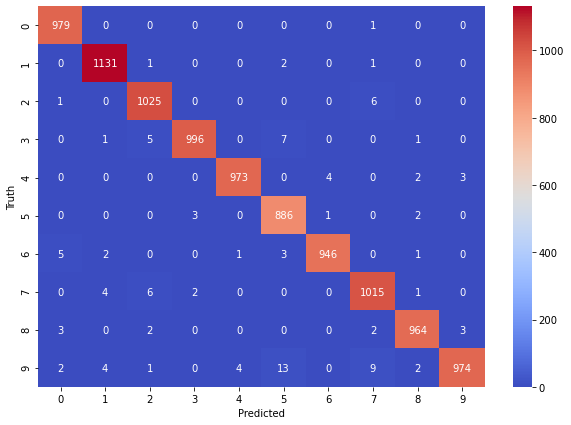

In [22]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

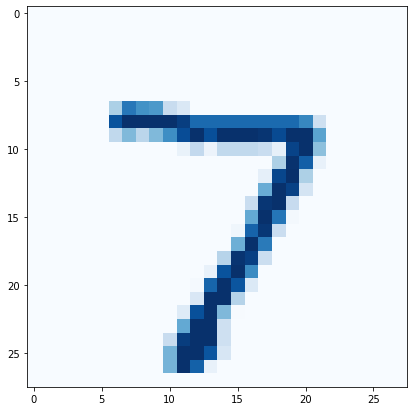

In [41]:
plt.imshow(np.squeeze(x_test[0]),cmap="Blues")

In [35]:
prediction=model.predict(x_test)
print(np.argmax(prediction[0]))

7


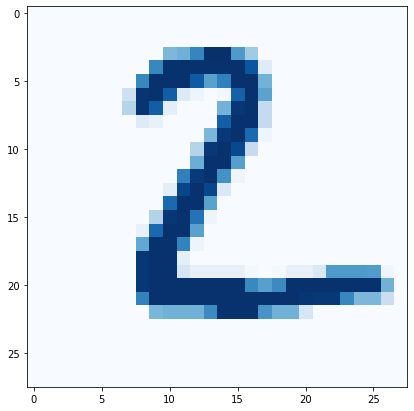

In [42]:
plt.imshow(np.squeeze(x_test[1]),cmap="Blues")

In [37]:
prediction=model.predict(x_test)
print(np.argmax(prediction[1]))

2


## **Thus , our model is predicting handwritten numbers with an accuracy of 98.89 %.**